<h1 style='color:blue;text-align:center'> House Price Prediction Model</h1>

<h1 style='color:green;text-align:right'> Linear Regression</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [37]:
df = pd.DataFrame({'area':[2600,3000,3200,3600,4000],'price':[550000,565000,610000,680000,725000]})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price($)')

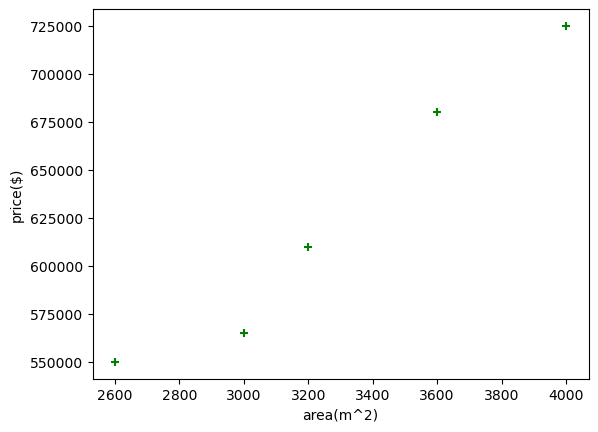

In [12]:
%matplotlib inline
plt.scatter(x=df['area'],y=df['price'],color='green',marker='+')
plt.xlabel('area(m^2)')
plt.ylabel('price($)')

In [17]:
lr = linear_model.LinearRegression()
lr.fit(df[['area']],df.price)

LinearRegression()

In [21]:
lr.predict([[3300]])

/home/jrana/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [22]:
lr.intercept_,lr.coef_

(180616.43835616432, array([135.78767123]))

$$y=mx+b$$
m=coef & b=intercept

<h1 style='color:blue;text-align:center'> Predicting Salary based on Year in Canada</h1>

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0.5, 1.0, 'Year vs Salary')

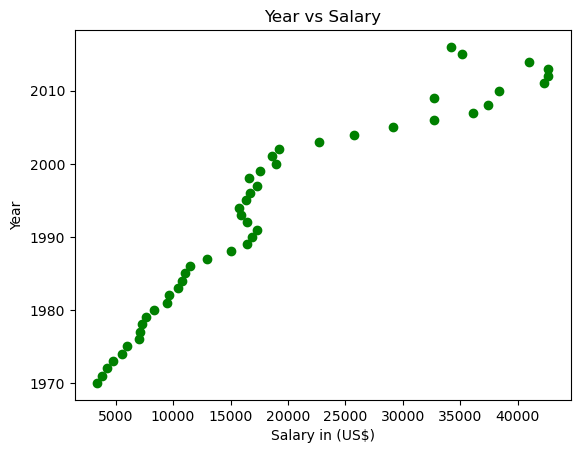

In [27]:
%matplotlib inline
plt.scatter(x=df['per capita income (US$)'],y=df['year'],color='green')
plt.xlabel('Salary in (US$)')
plt.ylabel('Year')
plt.title('Year vs Salary')

## Split data for training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_data=df[['per capita income (US$)']]
y_data=df['year']
x_train,x_test,y_train,y_test= train_test_split(x_data,y_data,test_size=0.2,random_state=0)

In [31]:
lr1 = linear_model.LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [36]:
lr1.predict(x_test)

array([1990.09871502, 1996.74386331, 1992.66770033, 1978.09833896,
       1988.42308787, 1982.28947643, 2018.39097944, 1992.24837195,
       1989.8699346 , 1981.11789471])

<h1 style='color:blue;text-align:center'> Predicting House Price depending on multiples Features</h1>

In [40]:
df['bedrooms']=np.array([3.0,4.0,np.nan,3.0,5.0])
df['age']=pd.Series(np.array([20,15,18,30,8]))
df

,area,price,age,bedrooms
0,2600,550000,20,3.0
1,3000,565000,15,4.0
2,3200,610000,18,NaN
3,3600,680000,30,3.0
4,4000,725000,8,5.0


## Handle missing values or NA
+ we can fill NA's with the mean value of that feature

In [43]:
import math
mn = math.floor(df['bedrooms'].mean())
mn

3

In [46]:
df.bedrooms.fillna(mn,inplace=True)

In [47]:
df

,area,price,age,bedrooms
0,2600,550000,20,3.0
1,3000,565000,15,4.0
2,3200,610000,18,3.0
3,3600,680000,30,3.0
4,4000,725000,8,5.0


## Our data set is now prepare to model building

Text(0.5, 1.0, 'price vs bedrooms')

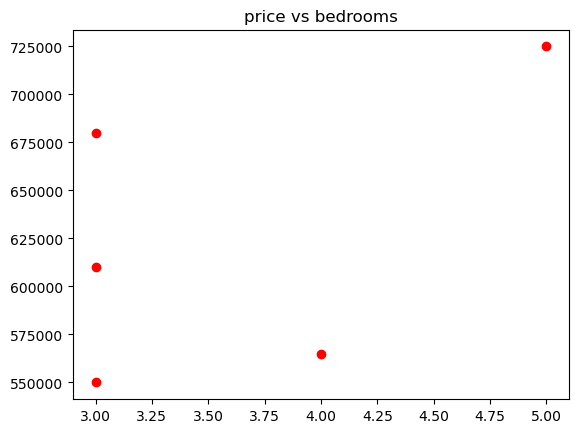

In [49]:
%matplotlib inline
plt.scatter(x=df['bedrooms'],y=df['price'],color='red')
plt.title('price vs bedrooms')

Text(0.5, 1.0, 'price vs age')

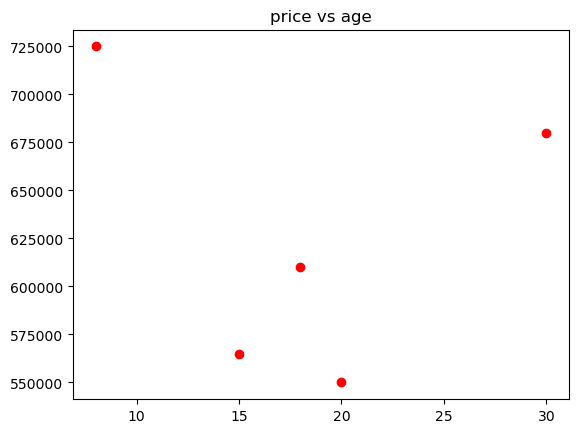

In [50]:
%matplotlib inline
plt.scatter(x=df['age'],y=df['price'],color='red')
plt.title('price vs age')

In [51]:
lr = linear_model.LinearRegression()

In [52]:
lr.fit(df[['age','bedrooms','area']],df['price'])

LinearRegression()

In [53]:
lr.coef_, lr.intercept_

(array([  337.5  , -6762.5  ,   143.625]), 173112.50000000128)

In [54]:
lr.predict([[23,3,2500]])

/home/jrana/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([519650.])

<h1 style='color:blue;text-align:center'> Predicting Salary based on multiples features</h1>

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')

In [63]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Data Preprocessing 

<code>experience</code> is a categorical variable. we can replace **na's'** a category having the heighst frequency.

In [58]:
df['experience'].value_counts()

five      1
two       1
seven     1
three     1
ten       1
eleven    1
Name: experience, dtype: int64

In [64]:
df['experience'].replace(np.nan,'three',inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,three,8.0,9,50000
1,three,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [65]:
exp_map={ 'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'ten':10,'eleven':11}
df['experience']=df['experience'].map(exp_map)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,3,8.0,9,50000
1,3,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [67]:
mn=df['test_score(out of 10)'].mean()
mn=math.floor(mn)
mn

7

In [68]:
df['test_score(out of 10)'].fillna(mn,inplace=True)

In [69]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,3,8.0,9,50000
1,3,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [70]:
x_data,y_data = df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)']

In [71]:
lr = linear_model.LinearRegression()
lr.fit(x_data,y_data)

LinearRegression()

In [73]:
lr.predict([[6,8,9]])

/home/jrana/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68717.07317073])

# One Hot Encoding
Converting categorical variable to numberic for better evaluation

In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv')
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [4]:
dummies = pd.get_dummies(df['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [6]:
merged = pd.concat([df,dummies],axis="columns")
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [7]:
df = merged.drop(['town','west windsor'],axis='columns')
df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [9]:
X=df.drop(['price'],axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [10]:
Y=df['price']
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [11]:
model.fit(X,Y)

LinearRegression()

In [13]:
model.score(X,Y)

0.9573929037221871

In [14]:
model.predict([[2600,0,1]])

/home/jrana/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([565396.15136531])

## Conver Categorical variable to numberic using <code style='color:red'> sklearn's LabelEncoder</code> class

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['town']=le.fit_transform(df['town'])
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Convert Car Model from categorical to numberc

In [19]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [20]:
df = pd.concat([df,dummies],axis='columns')
df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [23]:
X=df.drop(['Car Model','Sell Price($)','Mercedez Benz C class'],axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['town']=le.fit_transform(df['Car Model'])


In [33]:
df

,Car Model,Mileage,Sell Price($),Age(yrs),town
0,BMW X5,69000,18000,6,1
1,BMW X5,35000,34000,3,1
2,BMW X5,57000,26100,5,1
3,BMW X5,22500,40000,2,1
4,BMW X5,46000,31500,4,1
5,Audi A5,59000,29400,5,0
6,Audi A5,52000,32000,5,0
7,Audi A5,72000,19300,6,0
8,Audi A5,91000,12000,8,0
9,Mercedez Benz C class,67000,22000,6,2


<h1 style='color:green;text-align:right'> Logistic Regression</h1>

**Logistic Regression** is one of the techniques used for classification.<br/>
+ Classification Types
   + Binary Classification
      + yes or no. For example 'will a customer buy life insurance or not?'
   + Multiclass Classification
       + for example 'which party a person is going to vote for'
          + Democratic
          + Republician
          + Independent

<img src='s1.png' width=500 height=400>

Here the function $y=\frac{1}{1+e^{-z}}$ is called sigmoid function. $e$ is Euler's number. This Function converts input into range $0$ to $1$

In [35]:
df = pd.read_csv('/home/jrana/home/myCoolDataScienceLearning/datasets/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [36]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [37]:
import matplotlib.pyplot as plt

In [38]:
df.shape

(14999, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
x=df.salary.value_counts()

In [51]:
x=x.reset_index()
x.columns=['salaryRange','count']
x

,salaryRange,count
0,low,7316
1,medium,6446
2,high,1237


In [53]:
x['salaryRange']

0       low
1    medium
2      high
Name: salaryRange, dtype: object

<BarContainer object of 3 artists>

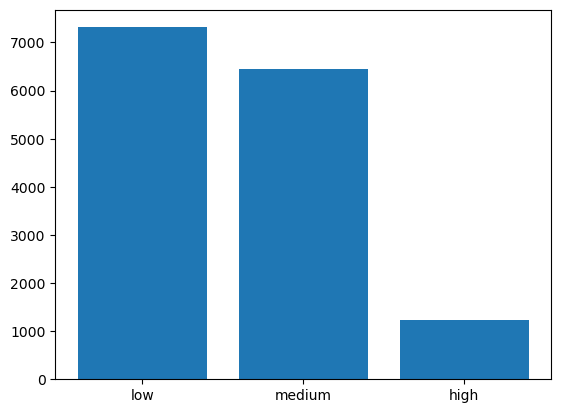

In [55]:
plt.bar(x['salaryRange'],x['count'])